Load Performance Results 


In [9]:


import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, precision_recall_curve, confusion_matrix, classification_report, roc_auc_score, f1_score
import joblib

# Load results
with open("../results/model_performance.json", "r") as f:
    results = json.load(f)

# Load model & scaler
model_data = joblib.load("../models/best_logistic_regression_model.pkl")
scaler = joblib.load("../models/scaler.pkl")

best_model = model_data["model"]
best_threshold = model_data["best_threshold"]

print(f"Loaded Model - ROC-AUC: {results['roc_auc']:.4f}, PR-AUC: {results['pr_auc']:.4f}, Threshold: {best_threshold:.4f}")

# Load test set
X_test = pd.read_csv("../data/processed/X_test.csv")
y_test = pd.read_csv("../data/processed/y_test.csv").squeeze()

# Ensure feature alignment
expected_features = model_data["feature_columns"]
if list(X_test.columns) != expected_features:
    missing_cols = set(expected_features) - set(X_test.columns)
    for col in missing_cols:
        X_test[col] = 0
    X_test = X_test[expected_features]

# Standardize test data
X_test = scaler.transform(X_test)

# Generate predictions
y_pred_proba = best_model.predict_proba(X_test)[:, 1]
y_pred = (y_pred_proba >= best_threshold).astype(int)


Loaded Model - ROC-AUC: 0.9253, PR-AUC: 0.7845, Threshold: 0.3432


Plot Precision-Recall Curve


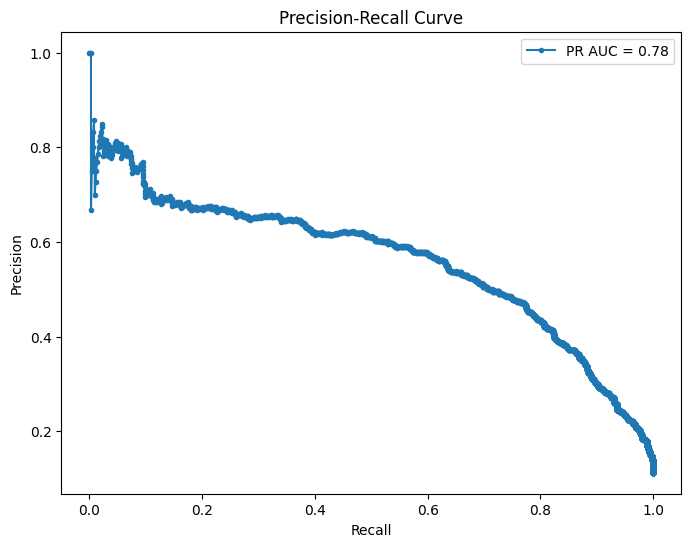

In [10]:


precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
plt.figure(figsize=(8,6))
plt.plot(recall, precision, marker='.', label=f'PR AUC = {results["pr_auc"]:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()



Plot ROC Curve

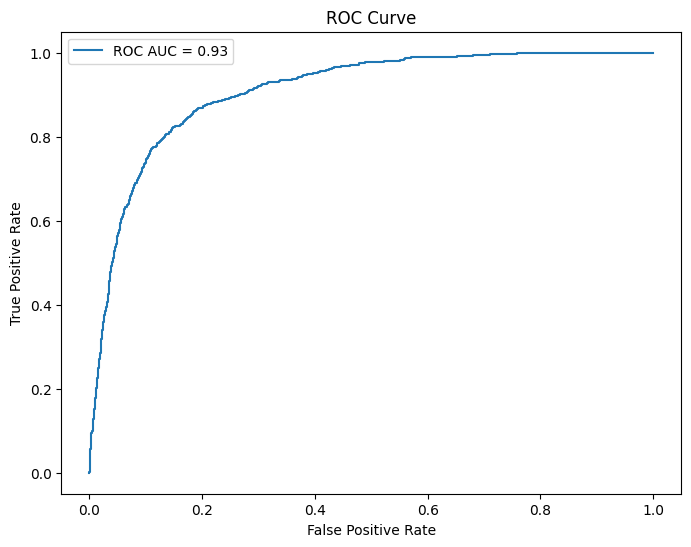

In [11]:

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC AUC = {results["roc_auc"]:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()



Plot Confusion Matrix

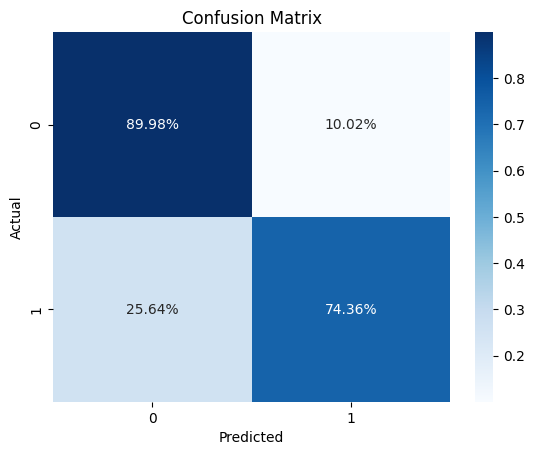

In [12]:

conf_matrix = confusion_matrix(y_test, y_pred, normalize='true')
sns.heatmap(conf_matrix, annot=True, fmt=".2%", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
